In [1720]:
import pandas as pd

In [1721]:
pd.set_option('display.max_columns', None)
filename = 'training_set.csv'
df = pd.read_csv(f'../data/model_training/unprocessed_data/{filename}')
df.head(2)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0


In [1722]:
df = df.drop(['id', 'attack_cat', 'label'], axis=1)

In [1723]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

((82332, 42), None)

In [1724]:
df.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000


In [1725]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [1726]:
df.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
dtype: int64

In [1727]:
df.head(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0


In [1728]:
"""
numeric_cols = df.select_dtypes(include=['float64']).columns
print(numeric_cols)
int_cols = df.select_dtypes(include=['int64']).columns
print(int_cols)
"""

"\nnumeric_cols = df.select_dtypes(include=['float64']).columns\nprint(numeric_cols)\nint_cols = df.select_dtypes(include=['int64']).columns\nprint(int_cols)\n"

In [1729]:
"""
df[numeric_cols] = df[numeric_cols].astype('float32')
"""

"\ndf[numeric_cols] = df[numeric_cols].astype('float32')\n"

In [1730]:
"""
df[int_cols].describe()
"""

'\ndf[int_cols].describe()\n'

In [1731]:

"""
col1 = ['spkts', 'dpkts', 'sloss', 'dloss', 'smean', 'dmean']
df[col1] = df[col1].astype('uint16')
"""

"\ncol1 = ['spkts', 'dpkts', 'sloss', 'dloss', 'smean', 'dmean']\ndf[col1] = df[col1].astype('uint16')\n"

In [1732]:
"""
col2 = ['sbytes', 'dbytes', 'stcpb', 'dtcpb', 'response_body_len']
df[col2] = df[col2].astype('uint16
"""

"\ncol2 = ['sbytes', 'dbytes', 'stcpb', 'dtcpb', 'response_body_len']\ndf[col2] = df[col2].astype('uint16\n"

In [1733]:
"""
print(numeric_cols.to_list())
"""

'\nprint(numeric_cols.to_list())\n'

In [1734]:
"""
int_cols = df.select_dtypes(include=['int64']).columns
print(int_cols)
"""

"\nint_cols = df.select_dtypes(include=['int64']).columns\nprint(int_cols)\n"

In [1735]:
"""
df[int_cols] = df[int_cols].astype('uint8')
"""

"\ndf[int_cols] = df[int_cols].astype('uint8')\n"

In [1736]:
cols = ['is_ftp_login', 'is_sm_ips_ports', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst']

In [1737]:
df[cols] = df[cols].astype('uint8')

In [1738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53946 entries, 0 to 82328
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                53946 non-null  float64
 1   proto              53946 non-null  object 
 2   service            53946 non-null  object 
 3   state              53946 non-null  object 
 4   spkts              53946 non-null  int64  
 5   dpkts              53946 non-null  int64  
 6   sbytes             53946 non-null  int64  
 7   dbytes             53946 non-null  int64  
 8   rate               53946 non-null  float64
 9   sttl               53946 non-null  int64  
 10  dttl               53946 non-null  int64  
 11  sload              53946 non-null  float64
 12  dload              53946 non-null  float64
 13  sloss              53946 non-null  int64  
 14  dloss              53946 non-null  int64  
 15  sinpkt             53946 non-null  float64
 16  dinpkt             53946 no

In [1739]:
df['proto'].nunique()

131

In [1740]:
df['proto'].unique()

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


In [1741]:
cat = pd.Categorical(df['proto'])

In [1742]:
mapping = {category: code for code, category in enumerate(cat.categories)}
print(mapping)


{'3pc': 0, 'a/n': 1, 'aes-sp3-d': 2, 'any': 3, 'argus': 4, 'aris': 5, 'arp': 6, 'ax.25': 7, 'bbn-rcc': 8, 'bna': 9, 'br-sat-mon': 10, 'cbt': 11, 'cftp': 12, 'chaos': 13, 'compaq-peer': 14, 'cphb': 15, 'cpnx': 16, 'crtp': 17, 'crudp': 18, 'dcn': 19, 'ddp': 20, 'ddx': 21, 'dgp': 22, 'egp': 23, 'eigrp': 24, 'emcon': 25, 'encap': 26, 'etherip': 27, 'fc': 28, 'fire': 29, 'ggp': 30, 'gmtp': 31, 'gre': 32, 'hmp': 33, 'i-nlsp': 34, 'iatp': 35, 'ib': 36, 'idpr': 37, 'idpr-cmtp': 38, 'idrp': 39, 'ifmp': 40, 'igmp': 41, 'igp': 42, 'il': 43, 'ip': 44, 'ipcomp': 45, 'ipcv': 46, 'ipip': 47, 'iplt': 48, 'ipnip': 49, 'ippc': 50, 'ipv6': 51, 'ipv6-frag': 52, 'ipv6-no': 53, 'ipv6-opts': 54, 'ipv6-route': 55, 'ipx-n-ip': 56, 'irtp': 57, 'isis': 58, 'iso-ip': 59, 'iso-tp4': 60, 'kryptolan': 61, 'l2tp': 62, 'larp': 63, 'leaf-1': 64, 'leaf-2': 65, 'merit-inp': 66, 'mfe-nsp': 67, 'mhrp': 68, 'micp': 69, 'mobile': 70, 'mtp': 71, 'mux': 72, 'narp': 73, 'netblt': 74, 'nsfnet-igp': 75, 'nvp': 76, 'ospf': 77, 'pg

In [1743]:
df['proto'] = cat.codes.astype('uint8')


In [1744]:
df['service'].nunique()

13

In [1745]:
df['service'].unique()

array(['-', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [1746]:
cat = pd.Categorical(df['service'])

In [1747]:
service_mapping = {category: code for code, category in enumerate(cat.categories)}
print(service_mapping)

{'-': 0, 'dhcp': 1, 'dns': 2, 'ftp': 3, 'ftp-data': 4, 'http': 5, 'irc': 6, 'pop3': 7, 'radius': 8, 'smtp': 9, 'snmp': 10, 'ssh': 11, 'ssl': 12}


In [1748]:
df['service'] = cat.codes.astype('uint8')

In [1749]:
df['state'].nunique()

7

In [1750]:
df['state'].unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO'], dtype=object)

In [1751]:
state_mapping = {
    'INT': 0,
    'FIN': 1,
    'REQ': 2,
    'ACC': 3,
    'CON': 4,
    'RST': 5,
    'CLO': 6
}

df['state'] = df['state'].map(state_mapping).astype('uint8')

In [1752]:
df['state'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=uint8)

In [1753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53946 entries, 0 to 82328
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                53946 non-null  float64
 1   proto              53946 non-null  uint8  
 2   service            53946 non-null  uint8  
 3   state              53946 non-null  uint8  
 4   spkts              53946 non-null  int64  
 5   dpkts              53946 non-null  int64  
 6   sbytes             53946 non-null  int64  
 7   dbytes             53946 non-null  int64  
 8   rate               53946 non-null  float64
 9   sttl               53946 non-null  int64  
 10  dttl               53946 non-null  int64  
 11  sload              53946 non-null  float64
 12  dload              53946 non-null  float64
 13  sloss              53946 non-null  int64  
 14  dloss              53946 non-null  int64  
 15  sinpkt             53946 non-null  float64
 16  dinpkt             53946 no

In [1754]:
float_cols = df.select_dtypes(include=['float64']).columns
float_cols
int_cols = df.select_dtypes(include=['int64']).columns
int_cols

Index(['spkts', 'dpkts', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_state_ttl', 'ct_ftp_cmd', 'ct_flw_http_mthd'],
      dtype='object')

In [1755]:
df[float_cols] = df[float_cols].astype('float32')
df[int_cols] = df[int_cols].astype('float32')


In [1756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53946 entries, 0 to 82328
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                53946 non-null  float32
 1   proto              53946 non-null  uint8  
 2   service            53946 non-null  uint8  
 3   state              53946 non-null  uint8  
 4   spkts              53946 non-null  float32
 5   dpkts              53946 non-null  float32
 6   sbytes             53946 non-null  float32
 7   dbytes             53946 non-null  float32
 8   rate               53946 non-null  float32
 9   sttl               53946 non-null  float32
 10  dttl               53946 non-null  float32
 11  sload              53946 non-null  float32
 12  dload              53946 non-null  float32
 13  sloss              53946 non-null  float32
 14  dloss              53946 non-null  float32
 15  sinpkt             53946 non-null  float32
 16  dinpkt             53946 no

In [1757]:
df.describe()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,53946.000000,53946.00000,53946.000000,53946.000000,53946.000000,53946.000000,5.394600e+04,5.394600e+04,53946.000000,53946.000000,53946.000000,5.394600e+04,5.394600e+04,53946.000000,53946.000000,53946.000000,53946.000000,5.394600e+04,53946.000000,53946.000000,5.394600e+04,5.394600e+04,53946.000000,53946.000000,53946.000000,53946.000000,53946.000000,53946.000000,53946.000000,5.394600e+04,53946.000000,53946.000000,53946.000000,53946.000000,53946.000000,53946.000000,53946.000000,53946.000000,53946.000000,53946.000000,53946.000000,53946.000000
mean,1.022179,111.51001,1.514459,1.233641,25.869759,25.967060,1.131112e+04,1.985872e+04,36179.699219,150.903687,136.375732,4.417520e+07,9.582204e+05,6.815797,9.388462,417.987793,115.800919,6.064820e+03,628.444275,191.545486,1.569283e+09,1.557169e+09,186.024246,0.080081,0.041936,0.038146,168.603745,170.481812,0.137174,2.417377e+03,5.969896,1.035628,3.273533,2.190709,1.486468,3.877711,0.009769,0.009862,0.160346,3.807437,5.496330,0.004968
std,3.918624,9.57705,2.442089,1.116988,161.148849,141.712234,2.071656e+05,1.866261e+05,112012.312500,106.739548,117.288887,1.947156e+08,2.900805e+06,77.904930,68.537613,4311.742188,1131.794312,4.847959e+04,3902.703613,110.259216,1.425232e+09,1.420018e+09,113.253242,0.132901,0.082649,0.063043,242.782867,281.508423,0.662173,4.701368e+04,7.114324,1.083967,4.594301,3.990693,2.516725,6.775809,0.098544,0.099552,0.561156,4.909204,7.011688,0.070309
min,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.004238,111.00000,0.000000,1.000000,4.000000,2.000000,5.320000e+02,1.780000e+02,24.097402,31.000000,29.000000,8.323655e+03,1.787040e+03,0.000000,0.000000,0.289930,0.008000,0.000000e+00,0.000000,255.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,44.000000,0.000000,0.000000e+00,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.388905,111.00000,0.000000,1.000000,10.000000,8.000000,9.000000e+02,3.540000e+02,65.447559,254.000000,252.000000,4.005692e+04,5.700335e+03,2.000000,1.000000,27.377833,20.718365,1.586128e+03,65.813782,255.000000,1.351368e+09,1.331709e+09,255.000000,0.028672,0.005944,0.011197,76.000000,56.000000,0.000000,0.000000e+00,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000
75%,0.937146,111.00000,2.000000,1.000000,16.000000,18.000000,2.158000e+03,1.824000e+03,3289.241089,254.000000,252.000000,9.414949e+05,2.485340e+05,4.000000,4.000000,78.063583,87.351461,4.473677e+03,177.930683,255.000000,2.823339e+09,2.806505e+09,255.000000,0.138948,0.072686,0.063794,132.000000,121.000000,0.000000,0.000000e+00,7.000000,1.000000,3.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,4.000000,6.000000,0.000000
max,59.999989,130.00000,12.000000,6.000000,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1000000.000000,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992188,57739.238281,1.483831e+06,463199.250000,255.000000,4.294950e+09,4.294881e+09,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000


In [1758]:
df.head(15)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,117,0,0,2.0,0.0,496.0,0.0,90909.093750,254.0,0.0,1.803636e+08,0.0,0.0,0.0,0.011000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.0,0.0,0.0,0.0,2,2.0,1,1,1,2,0,0.0,0.0,1,2,0
1,0.000008,117,0,0,2.0,0.0,1762.0,0.0,125000.000000,254.0,0.0,8.810000e+08,0.0,0.0,0.0,0.008000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,881.0,0.0,0.0,0.0,2,2.0,1,1,1,2,0,0.0,0.0,1,2,0
2,0.000005,117,0,0,2.0,0.0,1068.0,0.0,200000.000000,254.0,0.0,8.544000e+08,0.0,0.0,0.0,0.005000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,534.0,0.0,0.0,0.0,3,2.0,1,1,1,3,0,0.0,0.0,1,3,0
3,0.000006,117,0,0,2.0,0.0,900.0,0.0,166666.656250,254.0,0.0,6.000000e+08,0.0,0.0,0.0,0.006000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,0.0,0.0,3,2.0,2,2,1,3,0,0.0,0.0,2,3,0
4,0.000010,117,0,0,2.0,0.0,2126.0,0.0,100000.000000,254.0,0.0,8.504000e+08,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1063.0,0.0,0.0,0.0,3,2.0,2,2,1,3,0,0.0,0.0,2,3,0
5,0.000003,117,0,0,2.0,0.0,784.0,0.0,333333.312500,254.0,0.0,1.045333e+09,0.0,0.0,0.0,0.003000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,392.0,0.0,0.0,0.0,2,2.0,2,2,1,2,0,0.0,0.0,2,2,0
6,0.000006,117,0,0,2.0,0.0,1960.0,0.0,166666.656250,254.0,0.0,1.306667e+09,0.0,0.0,0.0,0.006000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,980.0,0.0,0.0,0.0,2,2.0,2,2,1,2,0,0.0,0.0,2,2,0
7,0.000028,117,0,0,2.0,0.0,1384.0,0.0,35714.285156,254.0,0.0,1.977143e+08,0.0,0.0,0.0,0.028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,0.0,0.0,0.0,3,2.0,1,1,1,3,0,0.0,0.0,1,3,0
8,0.000000,6,0,0,1.0,0.0,46.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,60000.687500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,2,2.0,2,2,2,2,0,0.0,0.0,2,2,1
9,0.000000,6,0,0,1.0,0.0,46.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,60000.710938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,2,2.0,2,2,2,2,0,0.0,0.0,2,2,1


**SCALING/NORMALIZING**

In [1760]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [1761]:
# -------------------------------
# CATEGORY 1: Log Transform + StandardScaler
# -------------------------------
cat1_cols = [
    'spkts', 'dpkts', 'sbytes', 'dbytes', 
    'sload', 'dload', 'rate', 
    'sinpkt', 'dinpkt', 'sjit', 'djit',
    'response_body_len', 'sloss', 'dloss', 'ackdat'
]

# Apply log1p to handle zeros, then standard scale
def log_standard_scaler(X):
    return StandardScaler().fit_transform(np.log1p(X))

In [1762]:
# -------------------------------
# CATEGORY 2: RobustScaler
# -------------------------------
cat2_cols = ['dur', 'stcpb', 'dtcpb', 'synack', 'tcprtt','smean', 'dmean']


In [1763]:
# -------------------------------
# CATEGORY 3: MinMaxScaler (0-1)
# -------------------------------
cat3_cols = [
    'sttl', 'dttl', 'swin', 'dwin', 
    'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_state_ttl', 'trans_depth'
]


In [1764]:
# -------------------------------
# CATEGORY 4: No scaling (embeddings)
# -------------------------------
cat4_cols = ['proto', 'service', 'state', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm', 
    'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'is_ftp_login']


In [1809]:
preprocessor = ColumnTransformer(
    transformers=[
        ('log_std', Pipeline([
            ('log', FunctionTransformer(np.log1p, validate=False)),
            ('std', StandardScaler())
        ]), cat1_cols),

        ('robust', RobustScaler(), cat2_cols),

        ('minmax', MinMaxScaler(), cat3_cols),

        ('cat_passthrough', 'passthrough', cat4_cols)
    ],
    remainder='drop',
    verbose_feature_names_out=False
).set_output(transform='pandas')

# ---------------------------------------
# Transform
# ---------------------------------------
df_transformed = preprocessor.fit_transform(df)

# ---------------------------------------
# Fix dtype of passed-through columns
# ---------------------------------------
for col in cat4_cols:
    df_transformed[col] = df_transformed[col].astype('uint8')



In [1811]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53946 entries, 0 to 82328
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   spkts              53946 non-null  float32
 1   dpkts              53946 non-null  float32
 2   sbytes             53946 non-null  float32
 3   dbytes             53946 non-null  float32
 4   sload              53946 non-null  float32
 5   dload              53946 non-null  float32
 6   rate               53946 non-null  float32
 7   sinpkt             53946 non-null  float32
 8   dinpkt             53946 non-null  float32
 9   sjit               53946 non-null  float32
 10  djit               53946 non-null  float32
 11  response_body_len  53946 non-null  float32
 12  sloss              53946 non-null  float32
 13  dloss              53946 non-null  float32
 14  ackdat             53946 non-null  float32
 15  dur                53946 non-null  float32
 16  stcpb              53946 no

In [1821]:
df_transformed = df_transformed.drop_duplicates().reset_index(drop=True)

In [1825]:
df_transformed.duplicated().sum()

0

In [1827]:
df_transformed.head(10)

,spkts,dpkts,sbytes,dbytes,sload,dload,rate,sinpkt,dinpkt,sjit,djit,response_body_len,sloss,dloss,ackdat,dur,stcpb,dtcpb,synack,tcprtt,smean,dmean,sttl,dttl,swin,dwin,ct_ftp_cmd,ct_flw_http_mthd,ct_state_ttl,trans_depth,proto,service,state,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,is_ftp_login
0,-1.268679,-1.524164,-0.452413,-1.768505,1.877094,-1.767865,1.623494,-1.232654,-1.148348,-1.476023,-1.255008,-0.313428,-1.253979,-0.989803,-0.691254,-0.416863,-0.478642,-0.474508,-0.081783,-0.206347,2.293333,-0.727273,0.996078,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,117,0,0,2,1,1,1,2,1,2,0,0
1,-1.268679,-1.524164,0.356391,-1.768505,2.297874,-1.767865,1.716546,-1.234029,-1.148348,-1.476023,-1.255008,-0.313428,-1.253979,-0.989803,-0.691254,-0.416866,-0.478642,-0.474508,-0.081783,-0.206347,10.733334,-0.727273,0.996078,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,117,0,0,2,1,1,1,2,1,2,0,0
2,-1.268679,-1.524164,0.036817,-1.768505,2.289741,-1.767865,1.853882,-1.235408,-1.148348,-1.476023,-1.255008,-0.313428,-1.253979,-0.989803,-0.691254,-0.416869,-0.478642,-0.474508,-0.081783,-0.206347,6.106667,-0.727273,0.996078,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,117,0,0,3,1,1,1,3,1,3,0,0
3,-1.268679,-1.524164,-0.072397,-1.768505,2.195967,-1.767865,1.800607,-1.234948,-1.148348,-1.476023,-1.255008,-0.313428,-1.253979,-0.989803,-0.691254,-0.416868,-0.478642,-0.474508,-0.081783,-0.206347,4.986667,-0.727273,0.996078,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,117,0,0,3,2,2,1,3,2,3,0,0
4,-1.268679,-1.524164,0.476286,-1.768505,2.288496,-1.767865,1.651343,-1.233112,-1.148348,-1.476023,-1.255008,-0.313428,-1.253979,-0.989803,-0.691254,-0.416864,-0.478642,-0.474508,-0.081783,-0.206347,13.160000,-0.727273,0.996078,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,117,0,0,3,2,2,1,3,2,3,0,0
5,-1.268679,-1.524164,-0.160434,-1.768505,2.343248,-1.767865,2.003146,-1.236330,-1.148348,-1.476023,-1.255008,-0.313428,-1.253979,-0.989803,-0.691254,-0.416871,-0.478642,-0.474508,-0.081783,-0.206347,4.213333,-0.727273,0.996078,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,117,0,0,2,2,2,1,2,2,2,0,0
6,-1.268679,-1.524164,0.424380,-1.768505,2.402447,-1.767865,1.800607,-1.234948,-1.148348,-1.476023,-1.255008,-0.313428,-1.253979,-0.989803,-0.691254,-0.416868,-0.478642,-0.474508,-0.081783,-0.206347,12.053333,-0.727273,0.996078,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,117,0,0,2,2,2,1,2,2,2,0,0
7,-1.268679,-1.524164,0.202244,-1.768505,1.901461,-1.767865,1.350490,-1.224939,-1.148348,-1.476023,-1.255008,-0.313428,-1.253979,-0.989803,-0.691254,-0.416844,-0.478642,-0.474508,-0.081783,-0.206347,8.213333,-0.727273,0.996078,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,117,0,0,3,1,1,1,3,1,3,0,0
8,-1.651232,-1.524164,-1.958924,-1.768505,-3.166290,-1.767865,-1.712774,3.852986,-1.148348,-1.476023,-1.255008,-0.313428,-1.253979,-0.989803,-0.691254,-0.416874,-0.478642,-0.474508,-0.081783,-0.206347,-0.400000,-0.727273,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,6,0,0,2,2,2,2,2,2,2,1,0
9,-1.651232,-1.524164,-1.958924,-1.768505,-3.166290,-1.767865,-1.712774,3.852987,-1.148348,-1.476023,-1.255008,-0.313428,-1.253979,-0.989803,-0.691254,-0.416874,-0.478642,-0.474508,-0.081783,-0.206347,-0.400000,-0.727273,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,6,0,0,2,2,2,2,2,2,2,1,0


In [1829]:
df_transformed.describe()

,spkts,dpkts,sbytes,dbytes,sload,dload,rate,sinpkt,dinpkt,sjit,djit,response_body_len,sloss,dloss,ackdat,dur,stcpb,dtcpb,synack,tcprtt,smean,dmean,sttl,dttl,swin,dwin,ct_ftp_cmd,ct_flw_http_mthd,ct_state_ttl,trans_depth,proto,service,state,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,is_ftp_login
count,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.00000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000
mean,0.004843,0.004462,0.005752,0.005169,0.009291,0.005184,0.005031,-0.011314,0.003283,0.003565,0.003687,0.000921,0.003684,0.002908,0.002031,0.682035,0.078816,0.081964,0.496854,0.371686,1.239523,1.493269,0.593518,0.540618,0.753365,0.73165,0.004945,0.010051,0.172139,0.001050,111.819941,1.518908,1.237190,5.983732,3.279430,2.193445,1.487116,3.885402,3.814922,5.508757,0.002064,0.009798
std,0.997620,0.997924,0.995833,0.996781,0.986656,0.996925,0.997155,0.979406,0.999491,0.999083,0.999253,1.001103,0.998994,1.000174,1.000759,4.205898,0.504633,0.505838,1.138286,0.957420,3.240563,3.659617,0.418005,0.463258,0.430998,0.44302,0.049847,0.035115,0.180700,0.005057,7.693620,2.444292,1.116571,7.120137,4.599691,3.996159,2.520277,6.784223,4.914406,7.018183,0.045381,0.098687
min,-1.651232,-1.524164,-2.362164,-1.768505,-3.166290,-1.767865,-1.712774,-1.237716,-1.148348,-1.476023,-1.255008,-0.313428,-1.253979,-0.989803,-0.691254,-0.416874,-0.478642,-0.474508,-0.081783,-0.206347,-0.693333,-0.727273,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,-0.786718,-0.723887,-0.405350,-0.187848,-0.769035,-0.214812,-0.769439,-1.121382,-1.144679,-1.476023,-1.255008,-0.313428,-0.521924,-0.989803,-0.691254,-0.412140,-0.478642,-0.474508,-0.081783,-0.206347,-0.253333,-0.155844,0.121569,0.114625,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,111.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,-0.042814,0.076391,-0.069567,0.020797,-0.349020,0.022516,-0.483437,0.305707,0.284053,0.529368,0.296374,-0.313428,-0.093699,-0.379858,-0.452708,0.003754,0.002600,0.003911,0.002002,0.016107,0.000000,0.000000,0.996078,0.996047,1.000000,1.00000,0.000000,0.000000,0.166667,0.000000,111.000000,0.000000,1.000000,4.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,0.000000,0.000000
75%,0.367905,0.620694,0.485825,0.520344,0.486171,0.809217,0.657745,0.782503,0.916459,0.810137,0.657022,-0.313428,0.445801,0.426446,0.499483,0.590276,0.523217,0.527199,0.919541,0.795525,0.746667,0.857143,0.996078,0.996047,1.000000,1.00000,0.000000,0.000000,0.166667,0.000000,111.000000,2.000000,1.000000,7.000000,4.000000,2.000000,1.000000,4.000000,4.000000,6.000000,0.000000,0.000000
max,6.443831,5.255737,6.108479,3.259378,2.772313,1.717956,2.324163,3.853058,3.901231,2.387413,3.551784,7.159619,7.806823,6.590173,25.614655,63.898140,1.042589,1.055823,44.311745,27.296446,19.040001,18.753246,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,130.000000,12.000000,6.000000,63.000000,59.000000,59.000000,38.000000,63.000000,60.000000,62.000000,1.000000,2.000000


In [1833]:
df_transformed.to_csv(f'../data/model_training/cleaned_data/{filename}', index=False)

**PLOTTING DATASET FOR BETTER VISUALIZATION**

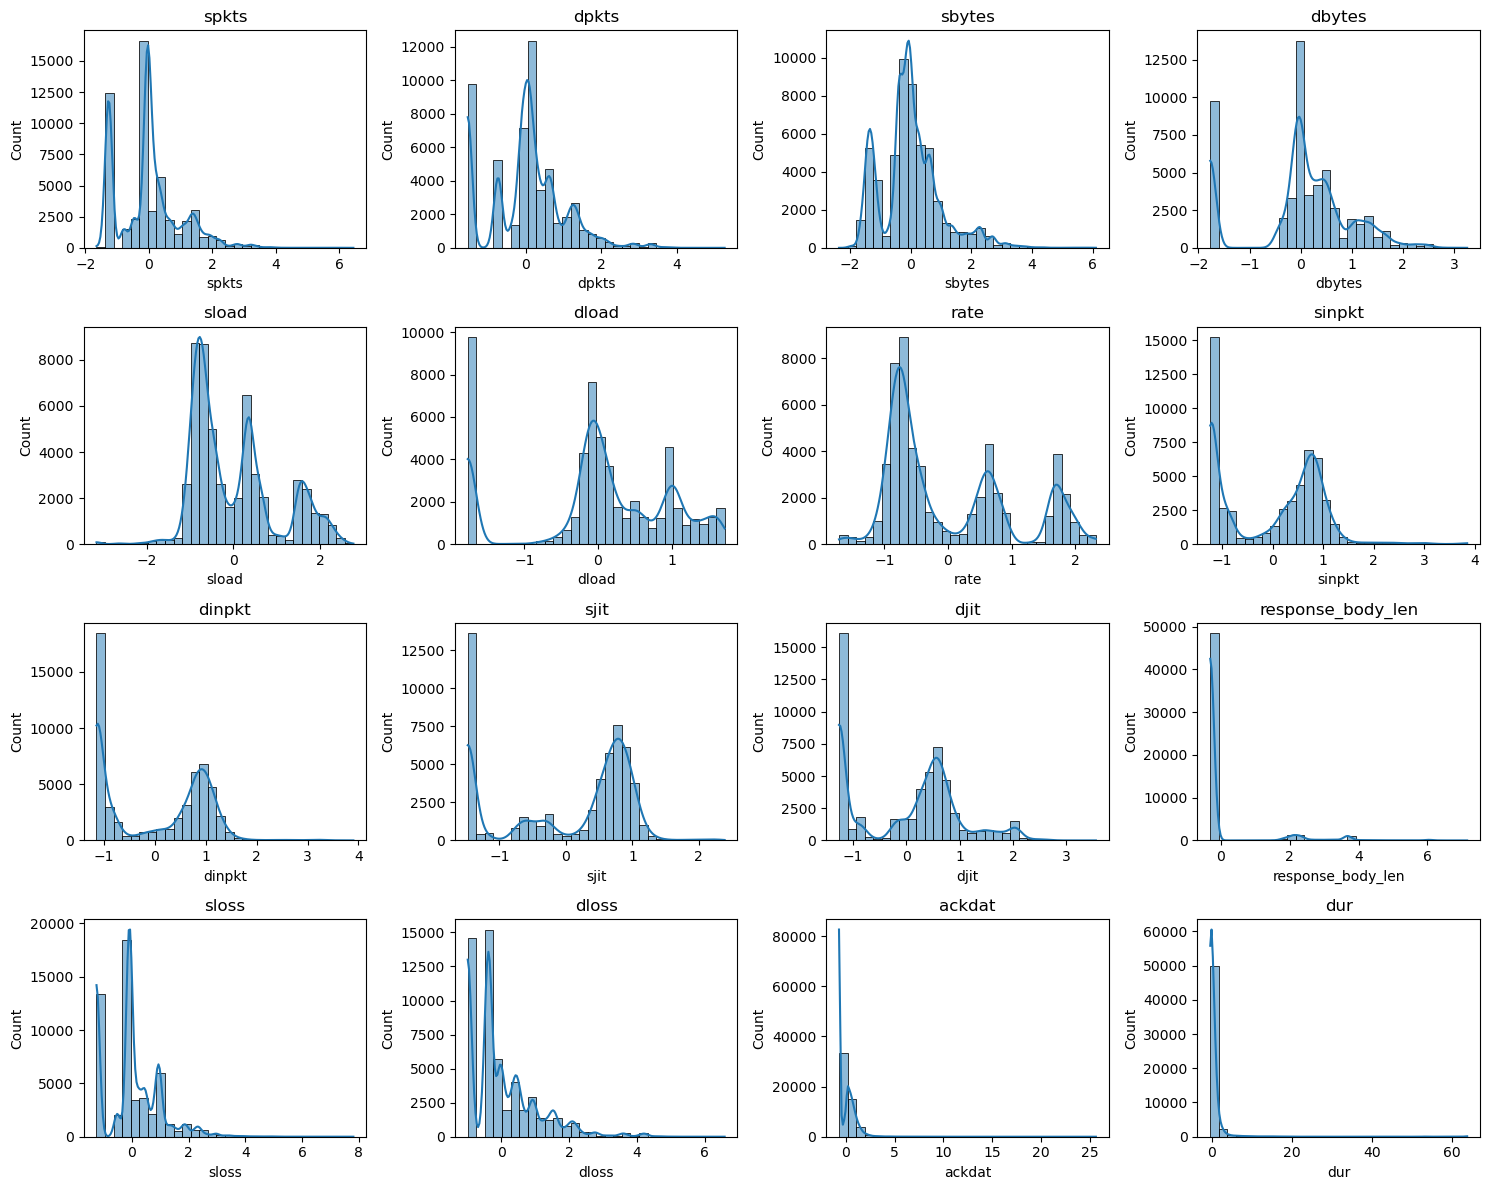

In [1837]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['spkts','dpkts','sbytes','dbytes','sload','dload','rate','sinpkt','dinpkt','sjit','djit','response_body_len','sloss','dloss','ackdat','dur']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_transformed[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


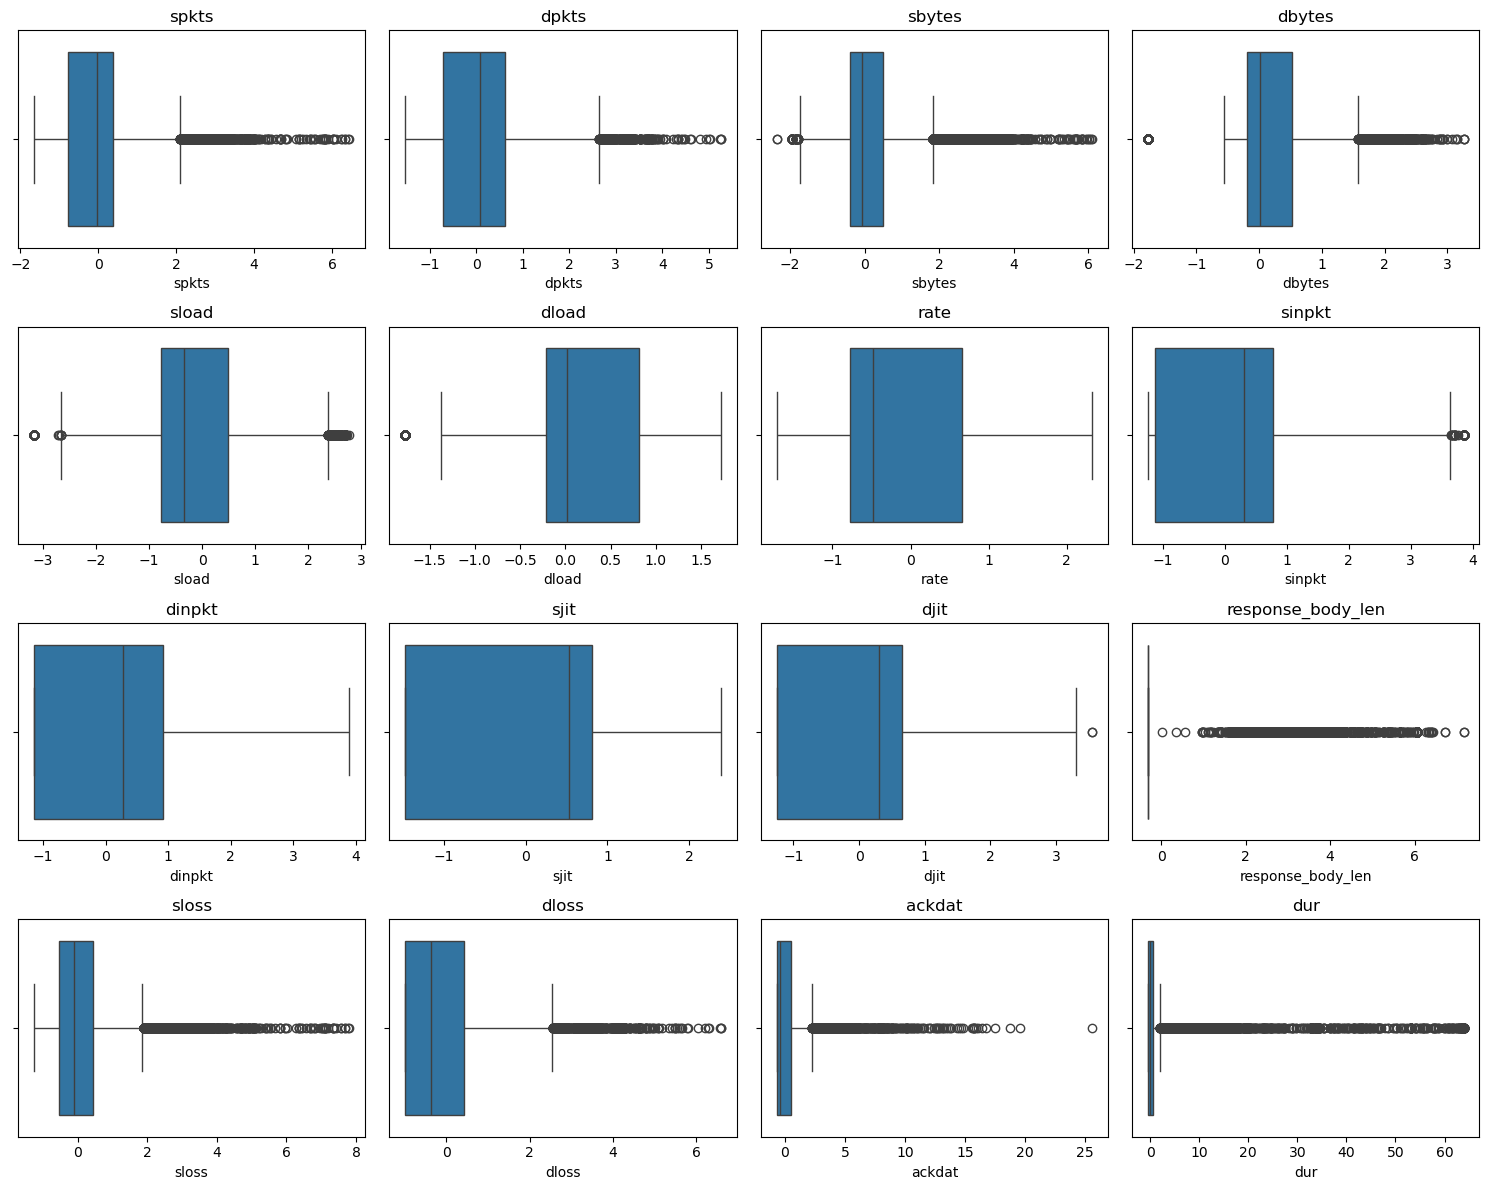

In [1846]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_transformed[col])
    plt.title(col)
plt.tight_layout()
plt.show()


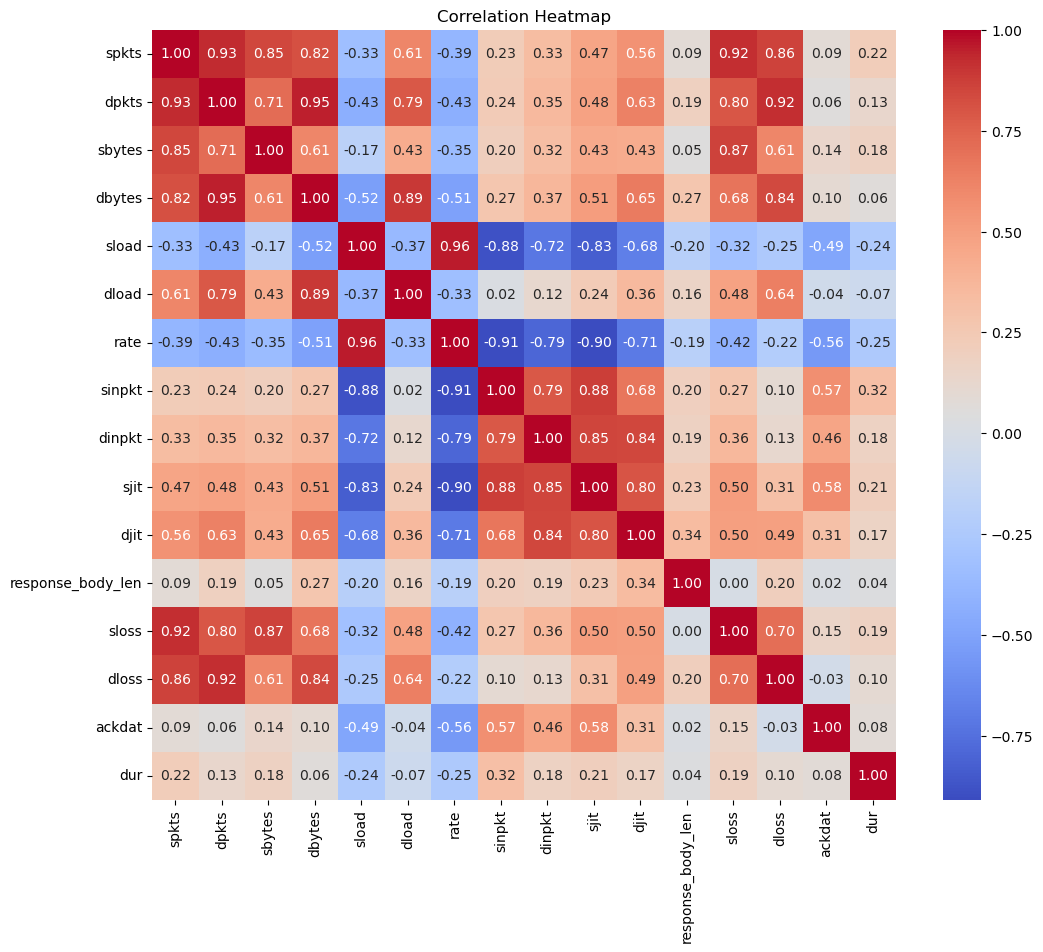

In [1840]:
plt.figure(figsize=(12,10))
corr = df_transformed[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


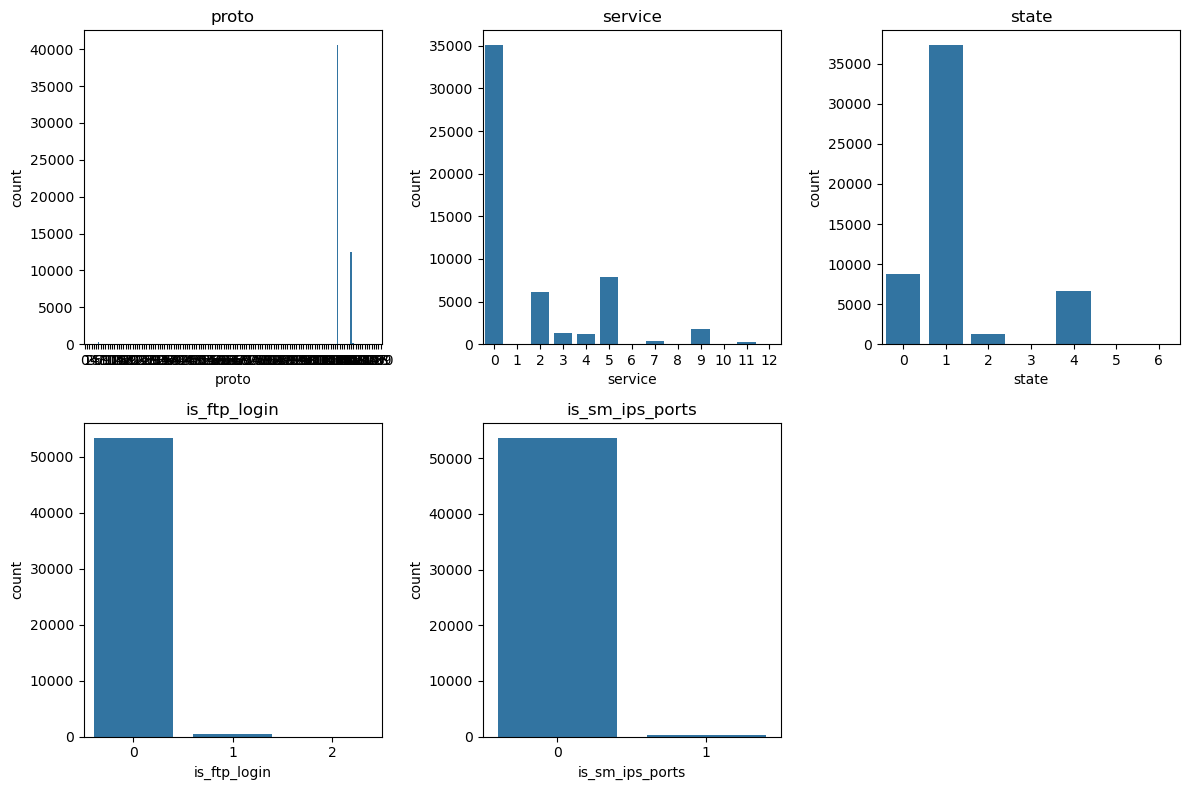

In [1848]:
cat_cols = ['proto','service','state','is_ftp_login','is_sm_ips_ports']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()


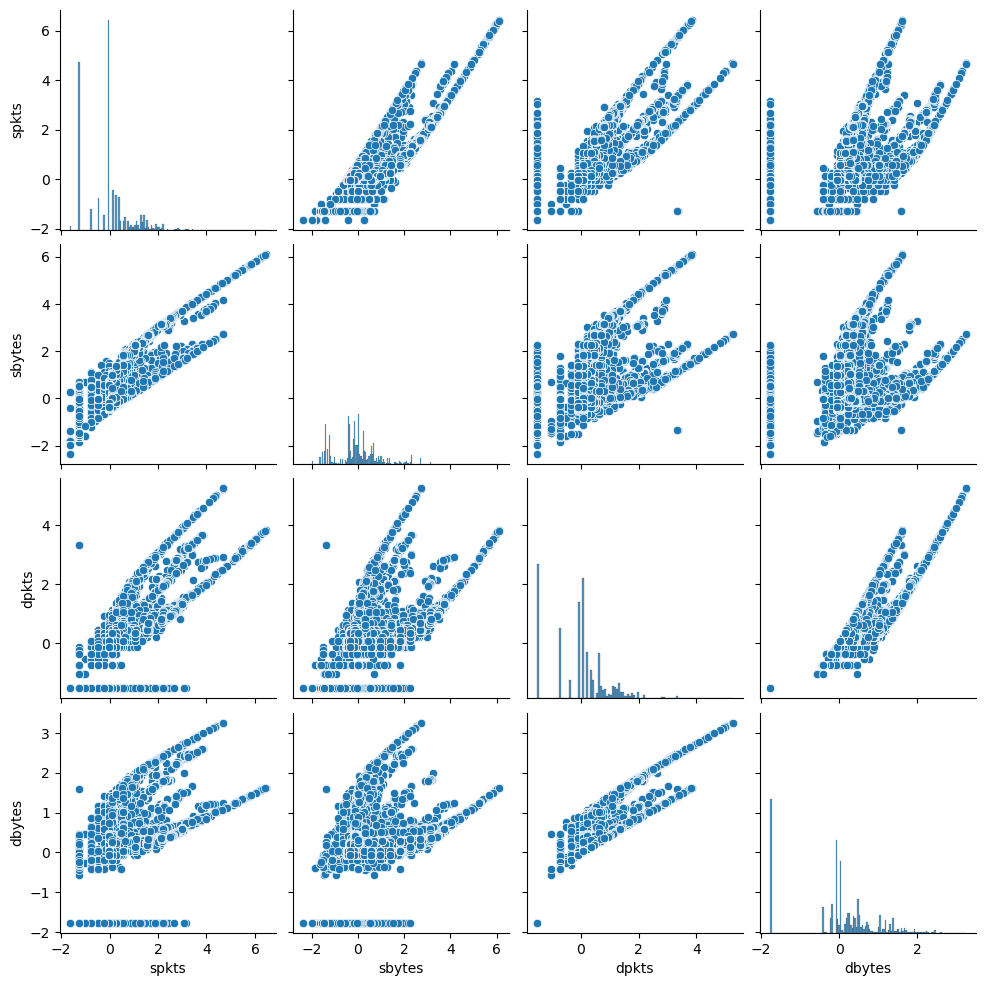

In [1842]:
sns.pairplot(df_scaled[['spkts','sbytes','dpkts','dbytes']])
plt.show()
